In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("bigmart_train.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test = pd.read_csv("bigmart_test.csv")

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.isnull().sum()/len(train)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [8]:
len(train)

8523

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [10]:
len(test)

5681

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
test.isnull().sum()/len(test)

Item_Identifier              0.000000
Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

# EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


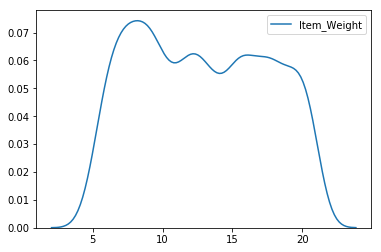

In [14]:
sns.kdeplot(train['Item_Weight'])

#weight of the products range from below 5 to above 20.
#most products have weight between 5-10.

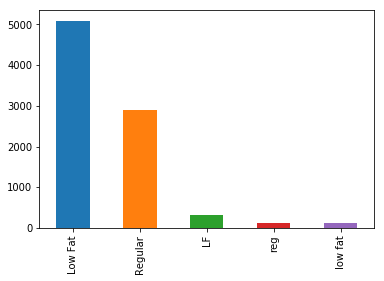

In [15]:
train['Item_Fat_Content'].value_counts().plot(kind = 'bar')

#majority of products have low fat content.

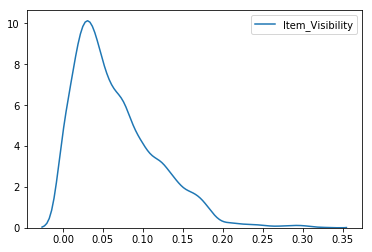

In [16]:
sns.kdeplot(train['Item_Visibility'])

#products have visibility in range of 0.00 - 0.35 with very less products having visibility beyond 0.20
#majority of products have visibility between 0.00 - 0.05.

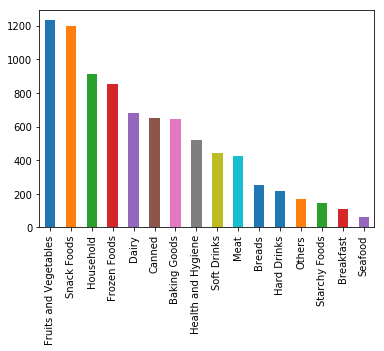

In [17]:
train['Item_Type'].value_counts().plot(kind = 'bar')

#fruits & veges and snack products make majority of total products. wherein breakfast foods and seafoods pertaining to least.

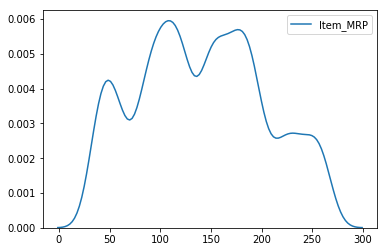

In [18]:
sns.kdeplot(train['Item_MRP'])

#Products have a price range of 0 - 300 Rs. 

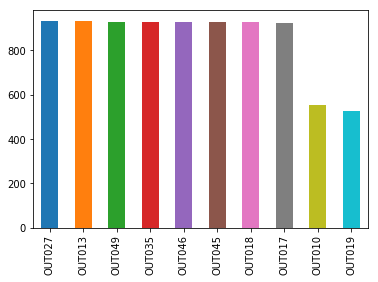

In [19]:
train['Outlet_Identifier'].value_counts().plot(kind = 'bar')

#apart from outlet no. 10 and 19 every other outlets have majority count.

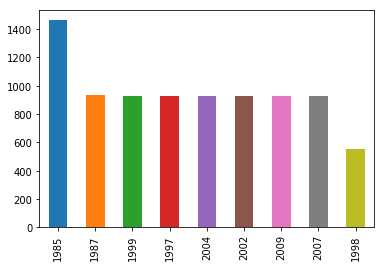

In [20]:
train['Outlet_Establishment_Year'].value_counts().plot(kind = 'bar')

#majority of the outlets were established in 1985.

# very less outlets were established in 1998.

#apart from 1985 & 1998, in all other years same no. of outlets are open!!

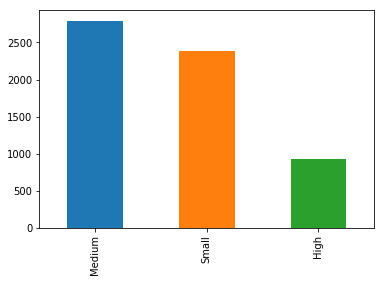

In [21]:
train['Outlet_Size'].value_counts().plot(kind = 'bar')

#majority of the outlets are medium sized and small sized. very few are high sized outlets.

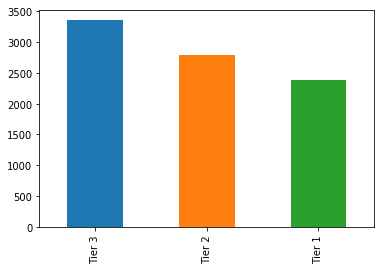

In [22]:
train['Outlet_Location_Type'].value_counts().plot(kind = 'bar')

#maximum of the outlets have tier3 location type. minority are the outlets placed in tier 1 location.

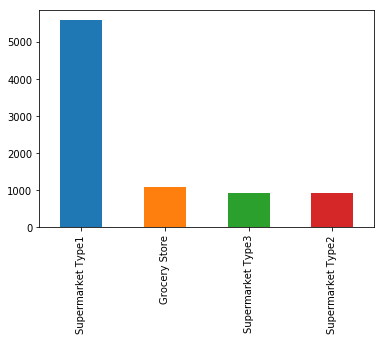

In [23]:
train['Outlet_Type'].value_counts().plot(kind = 'bar')

#majority of the outlets come under supermarket category. being more specifically from type1. => which implies them to of small & medium sized and of tier 3 location type.

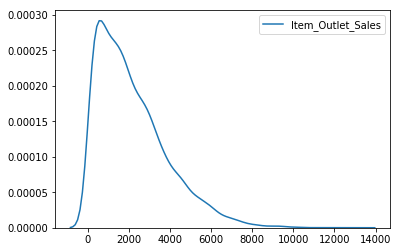

In [24]:
sns.kdeplot(train['Item_Outlet_Sales'])

#outlet sales range from 0 - 6000 with very few sales value beyond 6000.
#majority of outlets'sales value lies within 0 - 2000 range.

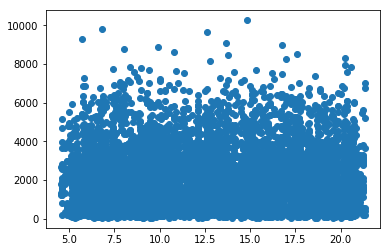

In [25]:
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'])

In [26]:
g = train.groupby(train['Item_Fat_Content'])

In [27]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

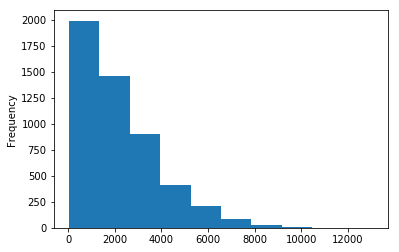

In [28]:
#LOW FAT
g1 = g.get_group('Low Fat')['Item_Outlet_Sales'].plot(kind = 'hist')

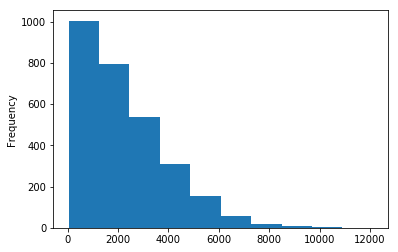

In [29]:
#Regular
g2 = g.get_group('Regular')['Item_Outlet_Sales'].plot(kind = 'hist')

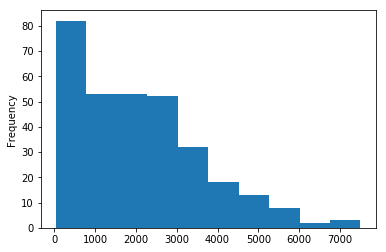

In [30]:
#LF
g3  = g.get_group('LF')['Item_Outlet_Sales'].plot(kind = 'hist')

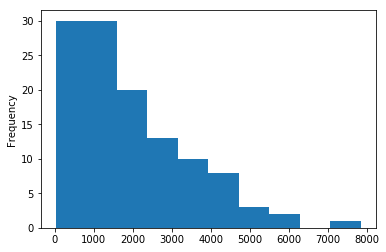

In [31]:
#reg
g4 = g.get_group('reg')['Item_Outlet_Sales'].plot(kind = 'hist')

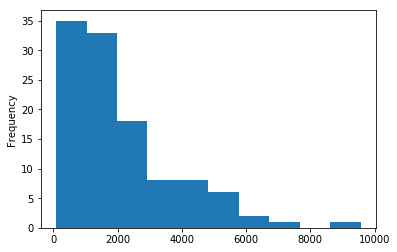

In [32]:
#low fat
g5 = g.get_group('low fat')['Item_Outlet_Sales'].plot(kind = 'hist')

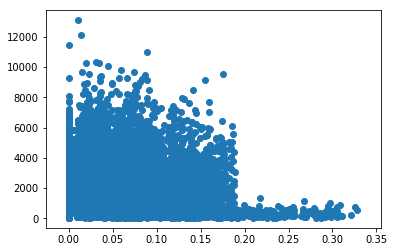

In [33]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])

In [34]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [35]:
k = train.groupby(train['Item_Type'])

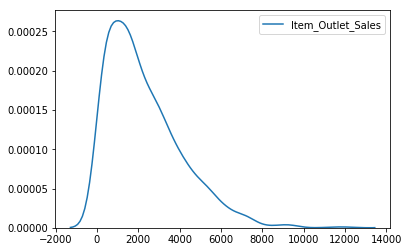

In [36]:
#fruits & veges
k1 = k.get_group('Fruits and Vegetables')['Item_Outlet_Sales']
sns.kdeplot(k1)

In [37]:
k1.describe()

count     1232.000000
mean      2289.009592
std       1799.503459
min         45.274400
25%        884.848200
50%       1830.950000
75%       3227.132600
max      12117.560000
Name: Item_Outlet_Sales, dtype: float64

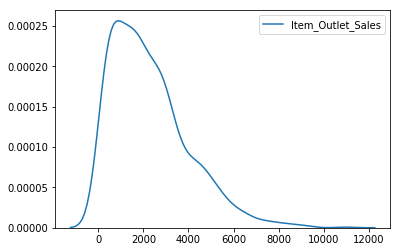

In [38]:
#snacks
k2 = k.get_group('Snack Foods')['Item_Outlet_Sales']
sns.kdeplot(k2)

In [39]:
k2.describe()

count     1200.000000
mean      2277.321739
std       1705.121755
min         33.955800
25%        918.804000
50%       1944.136000
75%       3143.574700
max      10993.689600
Name: Item_Outlet_Sales, dtype: float64

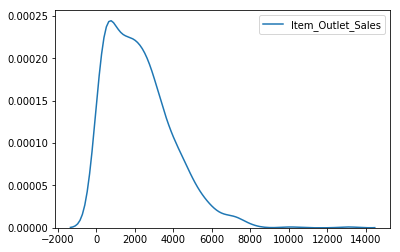

In [40]:
#household
k3 = k.get_group('Household')['Item_Outlet_Sales']
sns.kdeplot(k3)

In [41]:
k3.describe()

count      910.000000
mean      2258.784300
std       1692.245757
min         33.290000
25%        853.389150
50%       1981.420800
75%       3236.786700
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

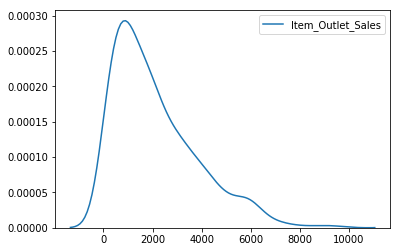

In [42]:
#frozen foods
k4 = k.get_group('Frozen Foods')['Item_Outlet_Sales']
sns.kdeplot(k4)

In [43]:
k4.describe()

count     856.000000
mean     2132.867744
std      1724.777720
min        36.619000
25%       808.947000
50%      1687.137200
75%      3079.491450
max      9678.068800
Name: Item_Outlet_Sales, dtype: float64

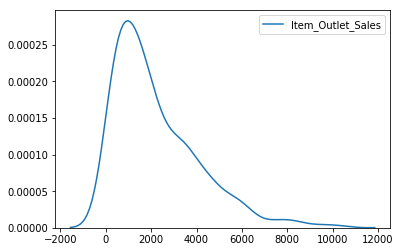

In [44]:
#dairy products
k5 = k.get_group ('Dairy')['Item_Outlet_Sales']
sns.kdeplot(k5)

In [45]:
k5.describe()

count      682.000000
mean      2232.542597
std       1884.404698
min         40.613800
25%        788.973000
50%       1650.851100
75%       3296.209350
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

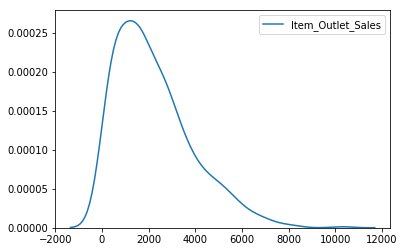

In [46]:
#canned products
k6 = k.get_group('Canned')['Item_Outlet_Sales']
sns.kdeplot(k6)

In [47]:
k6.describe()

count      649.000000
mean      2225.194904
std       1645.235638
min         37.950600
25%        952.094000
50%       1860.245200
75%       3101.296400
max      10306.584000
Name: Item_Outlet_Sales, dtype: float64

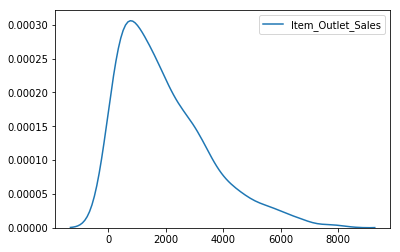

In [48]:
#baking foods
k7 = k.get_group('Baking Goods')['Item_Outlet_Sales']
sns.kdeplot(k7)

In [49]:
k7.describe()

count     648.000000
mean     1952.971207
std      1546.788045
min        37.284800
25%       705.082200
50%      1577.946000
75%      2823.824250
max      7931.675400
Name: Item_Outlet_Sales, dtype: float64

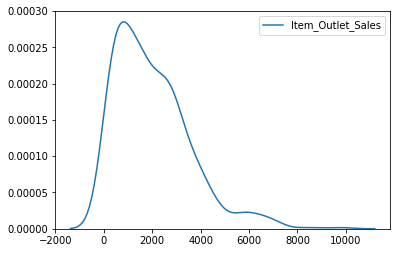

In [50]:
#Health and Hygiene
k8 = k.get_group('Health and Hygiene')['Item_Outlet_Sales']
sns.kdeplot(k8)

In [51]:
k8.describe()

count     520.000000
mean     2010.000265
std      1553.633063
min        34.621600
25%       758.845550
50%      1669.493500
75%      2884.578500
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

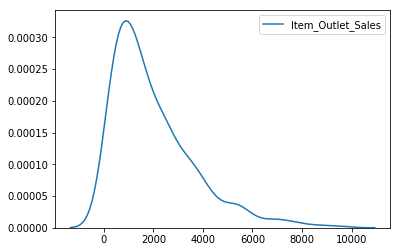

In [52]:
#soft drinks
k9 = k.get_group('Soft Drinks')['Item_Outlet_Sales']
sns.kdeplot(k9)

In [53]:
k9.describe()

count     445.000000
mean     2006.511735
std      1674.249752
min        33.290000
25%       771.662200
50%      1518.024000
75%      2759.075200
max      9554.230000
Name: Item_Outlet_Sales, dtype: float64

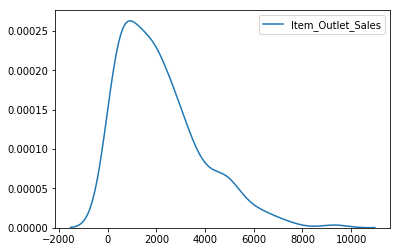

In [54]:
#meat
k10 = k.get_group('Meat')['Item_Outlet_Sales']
sns.kdeplot(k10)

In [55]:
k10.describe()

count     425.000000
mean     2158.977911
std      1695.231081
min        47.937600
25%       782.980800
50%      1829.618400
75%      3036.048000
max      9390.443200
Name: Item_Outlet_Sales, dtype: float64

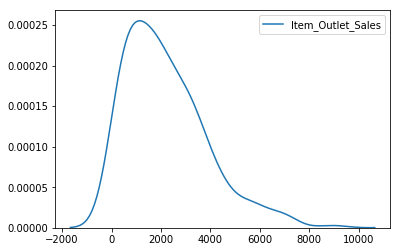

In [56]:
#breads
k11 = k.get_group('Breads')['Item_Outlet_Sales']
sns.kdeplot(k11)

In [57]:
k11.describe()

count     251.000000
mean     2204.132226
std      1644.235914
min        35.287400
25%       968.739000
50%      1860.245200
75%      3145.905000
max      8958.339000
Name: Item_Outlet_Sales, dtype: float64

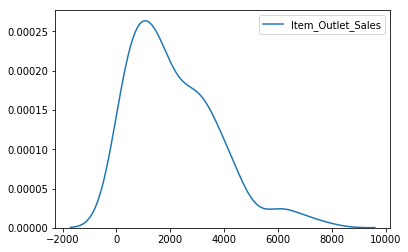

In [58]:
#hard drinks
k12 = k.get_group('Hard Drinks')['Item_Outlet_Sales']
sns.kdeplot(k12)

In [59]:
k12.describe()

count     214.000000
mean     2139.221622
std      1606.191587
min        37.950600
25%       834.913200
50%      1816.635300
75%      3071.335400
max      7843.124000
Name: Item_Outlet_Sales, dtype: float64

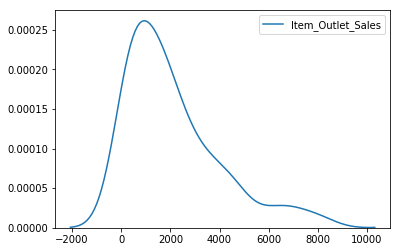

In [60]:
#breakfast products
k13 = k.get_group('Breakfast')['Item_Outlet_Sales']
sns.kdeplot(k13)

In [61]:
k13.describe()

count     110.000000
mean     2111.808651
std      1911.693586
min        39.948000
25%       679.116000
50%      1554.643000
75%      2970.300250
max      8209.314000
Name: Item_Outlet_Sales, dtype: float64

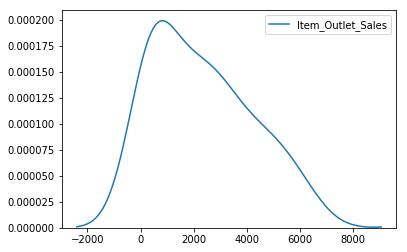

In [62]:
#seafoods
k14 = k.get_group('Seafood')['Item_Outlet_Sales']
sns.kdeplot(k14)

In [63]:
k14.describe()

count      64.000000
mean     2326.065928
std      1842.988719
min       149.805000
25%       473.383800
50%      2055.324600
75%      3589.327800
max      6503.534400
Name: Item_Outlet_Sales, dtype: float64

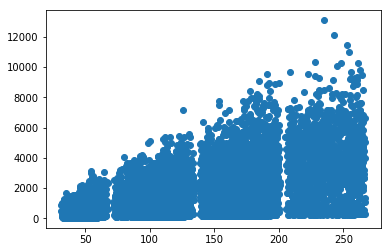

In [64]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])

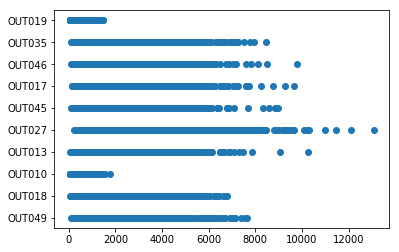

In [65]:
plt.scatter(train['Item_Outlet_Sales'],train['Outlet_Identifier'])

In [66]:
pd.crosstab(train['Outlet_Establishment_Year'],train['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Establishment_Year,,,,,,,,,,
1985,0,0,0,0,528,935,0,0,0,0
1987,0,932,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,930,0
1998,555,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,930
2002,0,0,0,0,0,0,0,929,0,0
2004,0,0,0,0,0,0,930,0,0,0
2007,0,0,926,0,0,0,0,0,0,0
2009,0,0,0,928,0,0,0,0,0,0


In [67]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [68]:
m = train.groupby(train['Outlet_Size'])

In [69]:
#Medium sized
m1 = m.get_group('Medium')['Item_Outlet_Sales']
m1.describe()

count     2793.000000
mean      2681.603542
std       1855.210528
min         69.243200
25%       1270.346400
50%       2251.069800
75%       3691.195200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [70]:
#small sized
m2 = m.get_group('Small')['Item_Outlet_Sales']
m2.describe()

count    2388.000000
mean     1912.149161
std      1582.370364
min        33.955800
25%       601.050950
50%      1544.656000
75%      2824.323600
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

In [71]:
#high sized
m3 = m.get_group('High')['Item_Outlet_Sales']
m3.describe()

count      932.000000
mean      2298.995256
std       1533.531664
min         73.238000
25%       1072.603800
50%       2050.664000
75%       3166.378350
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

In [72]:
pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [73]:
n = train.groupby(train['Outlet_Location_Type'])

In [74]:
#tier3
n1 = n.get_group('Tier 3')['Item_Outlet_Sales']
n1.describe()

count     3350.000000
mean      2279.627651
std       1912.451333
min         33.290000
25%        731.381300
50%       1812.307600
75%       3307.694400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [75]:
#tier2
n2 = n.get_group('Tier 2')['Item_Outlet_Sales']
n2.describe()

count    2785.000000
mean     2323.990559
std      1520.543543
min        99.870000
25%      1171.808000
50%      2004.058000
75%      3110.617600
max      9664.752800
Name: Item_Outlet_Sales, dtype: float64

In [76]:
#tier 1
n3 = n.get_group('Tier 1')['Item_Outlet_Sales']
n3.describe()

count    2388.000000
mean     1876.909159
std      1561.649293
min        33.955800
25%       593.727150
50%      1487.397200
75%      2803.018000
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

In [77]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [78]:
a = train.groupby(train['Item_Type'])

In [79]:
#fruits & veges
a1 = a.get_group('Fruits and Vegetables')['Item_MRP']
a1.describe()

count    1232.000000
mean      144.581235
std        60.475899
min        36.250600
25%        98.391000
50%       145.544400
75%       188.479300
max       264.225200
Name: Item_MRP, dtype: float64

In [80]:
#snakcs
a2 = a.get_group('Snack Foods')['Item_MRP']
a2.describe()

count    1200.000000
mean      146.194934
std        58.898002
min        32.355800
25%       104.345750
50%       146.673400
75%       185.825300
max       264.956800
Name: Item_MRP, dtype: float64

In [81]:
#household
a3 = a.get_group('Household')['Item_MRP']
a3.describe()

count    910.000000
mean     149.424753
std       62.394009
min       32.455800
25%      107.762200
50%      153.318200
75%      191.599750
max      264.791000
Name: Item_MRP, dtype: float64

In [82]:
#frozenfoods
a4 = a.get_group('Frozen Foods')['Item_MRP']
a4.describe()

count    856.000000
mean     138.503366
std       67.455074
min       31.955800
25%       83.699350
50%      128.649400
75%      190.584600
max      264.891000
Name: Item_MRP, dtype: float64

In [83]:
#dairy products
a5 = a.get_group('Dairy')['Item_MRP']
a5.describe()

count    682.000000
mean     148.499208
std       70.326744
min       33.487400
25%       88.827050
50%      147.540500
75%      213.371800
max      266.688400
Name: Item_MRP, dtype: float64

In [84]:
#canned products
a6 = a.get_group('Canned')['Item_MRP']
a6.describe()

count    649.000000
mean     139.763832
std       60.811624
min       36.350600
25%       89.880400
50%      140.149600
75%      184.592400
max      266.888400
Name: Item_MRP, dtype: float64

In [85]:
#baking goods
a7 = a.get_group('Baking Goods')['Item_MRP']
a7.describe()

count    648.000000
mean     126.380766
std       58.059573
min       33.987400
25%       84.067750
50%      112.354400
75%      170.992200
max      265.556800
Name: Item_MRP, dtype: float64

In [86]:
#health and hygiene
a8 = a.get_group('Health and Hygiene')['Item_MRP']
a8.describe()

count    520.000000
mean     130.818921
std       59.379481
min       33.121600
25%       95.391650
50%      128.034900
75%      163.851300
max      266.688400
Name: Item_MRP, dtype: float64

In [87]:
#soft drinks
a9 = a.get_group('Soft Drinks')['Item_MRP']
a9.describe()

count    445.000000
mean     131.492506
std       60.752561
min       31.290000
25%       82.427600
50%      144.010200
75%      176.205400
max      263.591000
Name: Item_MRP, dtype: float64

In [88]:
#meat
a10 = a.get_group('Meat')['Item_MRP']
a10.describe()

count    425.000000
mean     139.882032
std       58.117456
min       34.753200
25%       98.304200
50%      146.573400
75%      185.260800
max      261.593600
Name: Item_MRP, dtype: float64

In [89]:
#breads
a11 = a.get_group('Breads')['Item_MRP']
a11.describe()

count    251.000000
mean     140.952669
std       63.499685
min       31.955800
25%       91.314600
50%      129.131000
75%      194.729400
max      263.659400
Name: Item_MRP, dtype: float64

In [90]:
#hard drinks
a12 = a.get_group('Hard Drinks')['Item_MRP']
a12.describe()

count    214.000000
mean     137.077928
std       62.023378
min       34.253200
25%      106.318800
50%      144.944400
75%      177.684400
max      261.427800
Name: Item_MRP, dtype: float64

In [91]:
#breakfast
a13 = a.get_group('Breakfast')['Item_MRP']
a13.describe()

count    110.000000
mean     141.788151
std       58.457031
min       40.048000
25%       99.860800
50%      155.363000
75%      178.312000
max      234.930000
Name: Item_MRP, dtype: float64

In [92]:
#seafood
a14 = a.get_group('Seafood')['Item_MRP']
a14.describe()

count     64.000000
mean     141.841719
std       58.622816
min       33.721600
25%      109.209600
50%      158.560400
75%      184.708200
max      240.288000
Name: Item_MRP, dtype: float64

# Data Processing

In [93]:
#imputing missing value in train file!

In [94]:
#item_weight

In [95]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [96]:
#since there's no much significant diff between mean & median of variable => imputing variable with mean!

In [97]:
train['Item_Weight'].fillna(value = np.mean(train['Item_Weight']),inplace = True)

In [98]:
#outlet_size 

In [99]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [100]:
train['Outlet_Size'].fillna(value = 'Medium',inplace = True)

In [101]:
#imputing missing value in test file!

In [102]:
#item_Weight

In [103]:
test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [104]:
test['Item_Weight'].fillna(value = np.mean(test['Item_Weight']),inplace = True)

In [105]:
#Outlet size

In [106]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [107]:
test['Outlet_Size'].fillna(value = 'Medium',inplace = True)

# Checking Correlation!

In [108]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [109]:
#only item_mrp holds strong value of correlation with target variable : thus dropping all other variables in feature selection.!

# Creating dummies!

In [110]:
ifc = pd.get_dummies(train['Item_Fat_Content'])  ##dummies of item_fat_content

In [111]:
it = pd.get_dummies(train['Item_Type']) ##dummies of item_type

In [112]:
oz = pd.get_dummies(train['Outlet_Size'])  ##dummies of outlet size

In [114]:
olt = pd.get_dummies(train['Outlet_Location_Type'])  ##dummies of outlet location type

In [115]:
ot = pd.get_dummies(train['Outlet_Type']) ##dummies of outlet type

# Dropping variables and adding dummies => creating filtered train file!

In [117]:
train_1 = train[['Item_MRP','Item_Outlet_Sales']]

In [119]:
train_alt1 = train_1.join(ifc) #adding dummies of item_fat_Content

In [120]:
train_alt2 = train_alt1.join(it) #adding dummies of item_type

In [121]:
train_alt3 = train_alt2.join(oz) #adding dummies of outlet_size

In [122]:
train_alt4 = train_alt3.join(olt) #adding dummies of outlet location type

In [123]:
train_df = train_alt4.join(ot) #adding dummies of outlet type

In [124]:
train_df.head()

,Item_MRP,Item_Outlet_Sales,LF,Low Fat,Regular,low fat,reg,Baking Goods,Breads,Breakfast,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,249.8092,3735.1380,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,48.2692,443.4228,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,141.6180,2097.2700,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,182.0950,732.3800,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,53.8614,994.7052,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [125]:
train_df.corr()

,Item_MRP,Item_Outlet_Sales,LF,Low Fat,Regular,low fat,reg,Baking Goods,Breads,Breakfast,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_MRP,1.000000,0.567574,-0.006947,-0.000466,0.008299,-0.011904,-0.008865,-0.067311,-0.000112,0.001460,...,0.002438,-0.010578,0.009793,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-0.006714
Item_Outlet_Sales,0.567574,1.000000,-0.012389,-0.011993,0.022618,-0.006326,-0.015148,-0.038381,0.002332,-0.004656,...,0.024170,0.075154,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,0.311192
LF,-0.006947,-0.012389,1.000000,-0.238873,-0.140513,-0.022643,-0.023150,-0.009431,-0.004797,-0.011434,...,-0.005084,-0.006249,0.010318,-0.006275,-0.010932,0.016267,0.009036,-0.019290,0.015137,0.004637
Low Fat,-0.000466,-0.011993,-0.238873,1.000000,-0.871729,-0.140476,-0.143620,-0.077541,-0.033774,-0.056544,...,-0.000374,0.000657,-0.000454,0.000079,0.008213,-0.007960,-0.003339,0.008565,-0.005452,-0.004041
Regular,0.008299,0.022618,-0.140513,-0.871729,1.000000,-0.082632,-0.084482,0.080754,0.033603,0.065253,...,-0.002316,0.000693,0.000856,0.001960,-0.002123,0.000237,-0.002307,-0.000734,-0.002037,0.005605
low fat,-0.011904,-0.006326,-0.022643,-0.140476,-0.082632,1.000000,-0.013614,-0.002003,0.016464,-0.013195,...,0.018992,-0.007125,-0.005461,-0.003167,-0.003509,0.006282,0.011658,-0.007121,-0.010567,0.008945
reg,-0.008865,-0.015148,-0.023150,-0.143620,-0.084482,-0.013614,1.000000,0.015616,-0.002658,0.004377,...,0.000665,0.011529,-0.012981,0.004981,-0.004797,0.000026,-0.002625,0.005176,0.017030,-0.022054
Baking Goods,-0.067311,-0.038381,-0.009431,-0.077541,0.080754,-0.002003,0.015616,1.000000,-0.049968,-0.032801,...,0.003036,-0.006883,0.005364,0.003392,-0.000701,-0.002446,0.003536,0.001846,-0.003632,-0.002957
Breads,-0.000112,0.002332,-0.004797,-0.033774,0.033603,0.016464,-0.002658,-0.049968,1.000000,-0.019918,...,-0.005442,0.002523,0.001042,-0.005140,0.002933,0.001909,0.002305,-0.006189,-0.000734,0.007693
Breakfast,0.001460,-0.004656,-0.011434,-0.056544,0.065253,-0.013195,0.004377,-0.032801,-0.019918,1.000000,...,0.003236,-0.000322,-0.001898,0.005046,-0.008741,0.003754,0.015676,-0.008695,0.000077,-0.003550


In [126]:
#Thus keeping following variables based on corr value : item_mrp, regular, baking goods, fruits & veg, health & hygiene, small , tier1, grocery store, supermarket type3

# Assumption check!

In [133]:
df = train_df[['Item_MRP','Regular','Baking Goods','Fruits and Vegetables','Snack Foods','Health and Hygiene','Small','Tier 1','Grocery Store','Supermarket Type3','Item_Outlet_Sales']]

In [134]:
df.head()

,Item_MRP,Regular,Baking Goods,Fruits and Vegetables,Snack Foods,Health and Hygiene,Small,Tier 1,Grocery Store,Supermarket Type3,Item_Outlet_Sales
0,249.8092,0,0,0,0,0,0,1,0,0,3735.1380
1,48.2692,1,0,0,0,0,0,0,0,0,443.4228
2,141.6180,0,0,0,0,0,0,1,0,0,2097.2700
3,182.0950,1,0,1,0,0,0,0,1,0,732.3800
4,53.8614,0,0,0,0,0,0,0,0,0,994.7052


In [135]:
#keeping only above variables for checking assumptions of various models because only above variables will be
#taken forward for modeling purpose.!

In [136]:
#defining x for model

df_x = df.drop(columns = ['Item_Outlet_Sales'])

In [137]:
#defining y for model

df_y = df['Item_Outlet_Sales']

In [138]:
import statsmodels.formula.api as smf

In [139]:
#fitting model and inspecting results!!

In [140]:
results = smf.ols('df_y ~ df_x', data=df).fit()

In [141]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   df_y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:14:07   Log-Likelihood:                -72031.
No. Observations:                8523   AIC:                         1.441e+05
Df Residuals:                    8512   BIC:                         1.442e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7156     35.443      0.584      0.5

Test for Heteroskedasticity  : Bresuschpagan

In [143]:
import statsmodels.stats.api as sms

In [144]:
t = sms.het_breuschpagan(results.resid, results.model.exog)

In [145]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

In [146]:
bp_test = pd.DataFrame({'name':name,'test':t})

In [147]:
bp_test

,name,test
0,Lagrange multiplier statistic,1.200390e+03
1,p-value,1.187183e-251
2,f-value,1.395366e+02
3,f p-value,1.414909e-271


In [148]:
#Since p value is less than 0.05 we reject null hypothesis i.e. it is not homoskedastic & rather have HETEROSKEDASTICITY!
#which implies cannot apply ridge regression & linear regression!


Test for Normality : Jarque-Bera test

In [149]:
name1 = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test1 = sms.jarque_bera(results.resid)

In [150]:
jb = pd.DataFrame({'name':name1,'test':test1})

In [151]:
jb

,name,test
0,Jarque-Bera,2301.258310
1,Chi^2 two-tail prob.,0.000000
2,Skew,0.669188
3,Kurtosis,5.165383


In [156]:
#since p -value is less than 0.05 (=0.00),it rejects null hypothesis and hence it's not normal!

#which implies we cannot apply linear regression !

#we are not applying box-cox transformation as turning it normal would also not lead to applying linear regression!

# CV Run!

In [190]:
from sklearn.cross_validation import cross_val_score

In [191]:
#running cv on lasso regression

In [192]:
from sklearn.linear_model import Lasso

In [193]:
score_lasso = cross_val_score(Lasso(),df_x,df_y,cv=10)
np.mean(score_lasso)

0.5568188970381629

In [194]:
#running cv on decission tree regressor

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
score_dtr = cross_val_score(DecisionTreeRegressor(),df_x,df_y,cv=10)
np.mean(score_dtr)

0.17470913401551008

In [197]:
#running cv on random forest regressor

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
score_rfr = cross_val_score(RandomForestRegressor(),df_x,df_y,cv=10)
np.mean(score_rfr)

0.46163587968629705

In [200]:
#running cv on knn regressor

In [201]:
from sklearn.neighbors import KNeighborsRegressor

In [244]:
score_knr = cross_val_score(KNeighborsRegressor(),df_x,df_y,cv=10)
np.mean(score_knr)

0.4277531946426256

In [242]:
#running elastic net regression

In [243]:
from sklearn.linear_model import ElasticNet

In [247]:
score_enr = cross_val_score(ElasticNet(),df_x,df_y,cv=10)
np.mean(score_enr)

0.40710970193660145

Thus, going ahead with lasso regression model.!

# Feature Selection !

In [208]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=123)

In [212]:
y1_train = y_train.ravel()

In [213]:
y1_test = y_test.ravel()

In [214]:
#build lasso regressor to use in feature selection

In [215]:
clf = Lasso()

In [216]:
#building step forward feature selection

In [217]:
sfs1 = sfs(clf,k_features=5,forward=True,floating=False,verbose=2,cv=5)

In [218]:
#perfrom sffs

In [219]:
sfs1 = sfs1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-08-10 01:59:43] Features: 1/5 -- score: 0.32406854642071686[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-08-10 01:59:43] Features: 2/5 -- score: 0.4873366011984082[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-08-10 01:59:44] Features: 3/5 -- score: 0.5521700927088445[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-08-10 01:59:44] Features: 4/5 -- score: 0.5525501390695573[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0

In [220]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 6, 8, 9]


In [221]:
df_x.head()

,Item_MRP,Regular,Baking Goods,Fruits and Vegetables,Snack Foods,Health and Hygiene,Small,Tier 1,Grocery Store,Supermarket Type3
0,249.8092,0,0,0,0,0,0,1,0,0
1,48.2692,1,0,0,0,0,0,0,0,0
2,141.6180,0,0,0,0,0,0,1,0,0
3,182.0950,1,0,1,0,0,0,0,1,0
4,53.8614,0,0,0,0,0,0,0,0,0


# Redifining x and y for building model!

In [223]:
x = df[['Item_MRP','Regular','Small','Grocery Store','Supermarket Type3']]

In [224]:
y = df['Item_Outlet_Sales']

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# Building basic Lasso model!

In [227]:
m1 = Lasso()

In [228]:
m11 = m1.fit(X_train,Y_train)

In [229]:
m11_pred = m11.predict(X_test)

In [231]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(Y_test, m11_pred))
print(rmse1)

1139.8727625857891


In [262]:
from sklearn.metrics import mean_absolute_error

In [263]:
mean_absolute_error(Y_test,m11_pred)

846.1288812511109

In [298]:
from sklearn.metrics import r2_score

In [299]:
r2_score(Y_test,m11_pred)

0.5698461844666023

# Tunning model

In [232]:
ls_param = {
    'alpha' : [1,2,3],
    'fit_intercept' : [True,False],
    'normalize':[True,False],
    'precompute' : [True,False],
    'copy_X' : [True,False],
    'random_state' : [100,130,150]
}

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
ls_search = GridSearchCV(estimator=Lasso(),param_grid=ls_param,cv=5)

In [236]:
ls_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3], 'fit_intercept': [True, False], 'normalize': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'random_state': [100, 130, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [237]:
ls_search.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'precompute': False,
 'random_state': 100}

In [238]:
m2 = Lasso(alpha=1,copy_X=True,fit_intercept=True,normalize=False,precompute=True,random_state=100)

In [239]:
m22 = m2.fit(X_train,Y_train)

In [240]:
m22_pred = m22.predict(X_test)

In [241]:
rmse2 = sqrt(mean_squared_error(Y_test,m22_pred))
print(rmse1)

1139.8727625857891


In [264]:
mean_absolute_error(Y_test,m22_pred)

846.1288812511109

In [300]:
r2_score(Y_test,m22_pred)

0.5698461844666022

# Bagging on tunned model

In [248]:
from sklearn.ensemble import BaggingRegressor

In [249]:
bagg_f = BaggingRegressor(base_estimator=m22)

In [250]:
bagg_f.fit(X_train,Y_train)

BaggingRegressor(base_estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=True, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [251]:
bagg_pred = bagg_f.predict(X_test)

In [252]:
rmse3 = sqrt(mean_squared_error(Y_test,bagg_pred))
print(rmse3)

1140.2911612294952


In [265]:
mean_absolute_error(Y_test,bagg_pred)

846.3235556345982

In [301]:
r2_score(Y_test,bagg_pred)

0.5695303442963213

# Boosting on tunned model

In [253]:
from sklearn.ensemble import AdaBoostRegressor

In [258]:
boost = AdaBoostRegressor(base_estimator = m22)

In [259]:
boost.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=True, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [260]:
boost_pred = boost.predict(X_test)

In [261]:
rmse4 = sqrt(mean_squared_error(Y_test,boost_pred))
print(rmse4)

1170.9695873760998


In [266]:
mean_absolute_error(Y_test,boost_pred)

884.917219057942

In [302]:
r2_score(Y_test,boost_pred)

0.5460560228826015

Therefore, going forward with basic lasso model as rmse and mae is least for it.!